In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# Load model and saved weights (.keras file)
model = load_model("../deeplearning/models/cnn_final_15k.keras")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, 128, 128, 3)       0         
 ial)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_2 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                      

In [39]:
IMG_SIZE = (128, 128)  # use same as training

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    "../datasets/val",
    labels="inferred",
    label_mode="binary",
    image_size=IMG_SIZE,
    batch_size=32,
    shuffle=False
)

# === Normalize (same as rescale=1./255 in generator) ===
val_ds = val_ds_raw.map(lambda x, y: (x / 255.0, y))

# --- Predict ---
pred_probs = model.predict(val_ds, verbose=0)       # shape (N, 1) or (N,)
pred_probs = np.asarray(pred_probs).reshape(-1)     # flatten to (N,)
y_pred = (pred_probs >= 0.5).astype(int)           # (N,)

print("prediction done")

Found 5000 files belonging to 2 classes.
prediction done


In [40]:
# --- Get true labels aligned with dataset order ---
y_true = tf.concat([y for _, y in val_ds], axis=0).numpy()  # (N, 1)
y_true = y_true.reshape(-1).astype(int)                     # (N,)

# --- Wrong indices ---
wrong_idx = np.where(y_pred != y_true)[0]
print(f"Total samples: {len(y_true)}")
print(f"Wrongly classified samples: {len(wrong_idx)}")

Total samples: 5000
Wrongly classified samples: 768


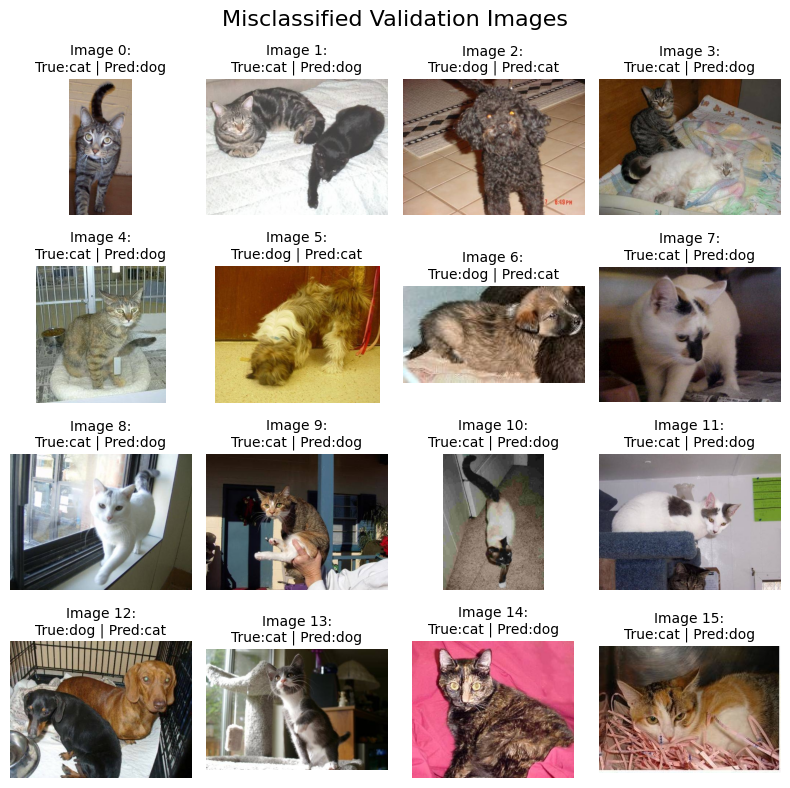

In [48]:
n_show = min(16, len(wrong_idx))
# --- pick random misclassified indices ---
rand_wrong_idx = random.sample(list(wrong_idx), n_show)
cols = 4
rows = math.ceil(n_show / cols)
file_paths = np.array(val_ds_raw.file_paths)  # paths in the same order
plt.figure(figsize=(8, 8))

for j, i in enumerate(rand_wrong_idx):
    img = plt.imread(file_paths[i])
    plt.subplot(rows, cols, j + 1)
    plt.imshow(img)
    plt.title(
        f"Image {j}:\nTrue:{'dog' if y_true[i]==1 else 'cat'} | Pred:{'dog' if y_pred[i]==1 else 'cat'}",
        fontsize=10
    )
    plt.axis('off')

plt.suptitle("Misclassified Validation Images", fontsize=16)
plt.tight_layout()
plt.show()

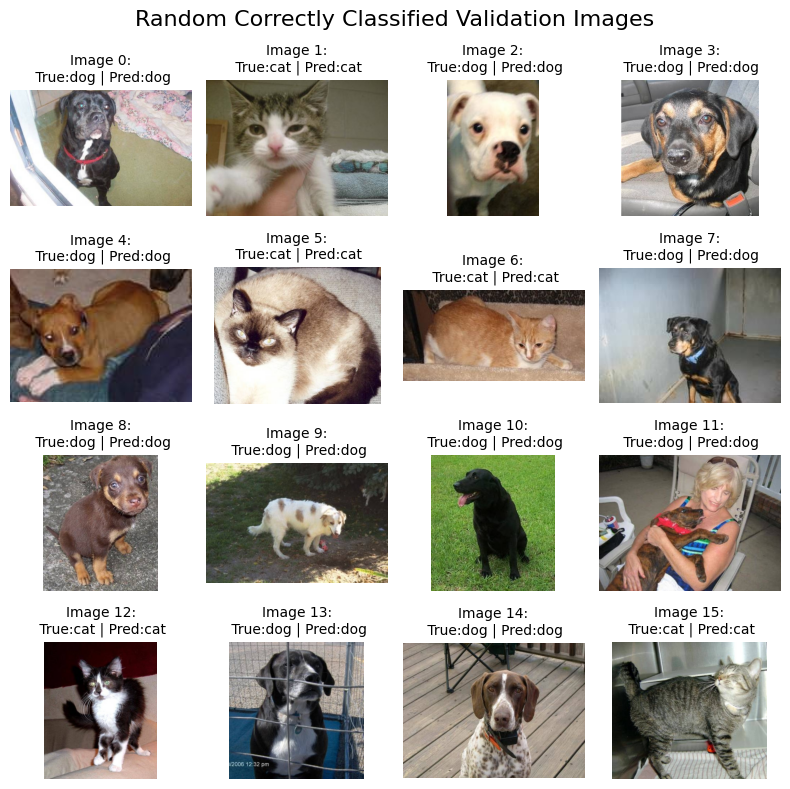

In [51]:
# --- Random correct samples ---
correct_idx = np.where(y_pred == y_true)[0]
rand_correct_idx = random.sample(list(correct_idx), min(n_show, len(correct_idx)))

plt.figure(figsize=(8, 8))
for j, i in enumerate(rand_correct_idx):
    img = plt.imread(file_paths[i])
    plt.subplot(rows, cols, j + 1)
    plt.imshow(img)
    plt.title(
        f"Image {j}:\n True:{'dog' if y_true[i]==1 else 'cat'} | Pred:{'dog' if y_pred[i]==1 else 'cat'}",
        fontsize=10,
    )
    plt.axis('off')

plt.suptitle("Random Correctly Classified Validation Images", fontsize=16)
plt.tight_layout()
plt.show()
